#Integração das bases

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import plotly.graph_objects as go


In [101]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Taxa de Rendimento

Dados reitados desse site porque o link não estava funcionando 

https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/indicadores-educacionais/taxas-de-rendimento

###2017

In [102]:
df_2017 = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/Machine Learning/Bases/trabalho_pratico02/TX_REND_BRASIL_REGIOES_UFS_2017.xlsx")

In [103]:
df_2017.columns

Index(['Unnamed: 0', '                     Ministério da Educação',
       'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51',
       'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55',
       'Unnamed: 56', 'Unnamed: 57'],
 

In [104]:
# Selecionando colunas específicas
df_2017 = df_2017.loc[:, ['Unnamed: 0','Unnamed: 2','Unnamed: 3','                     Ministério da Educação','Unnamed: 40']]

#Selecionando linhas baseadas em condição
options1 = ['Total'] 

df1 = df_2017[(df_2017['Unnamed: 2'].isin(options1)) & df_2017['Unnamed: 3'].isin(options1)]

# Deletando as colunas baseadas nas condicões
df2 = df1.drop(['Unnamed: 2','Unnamed: 3'], axis = 1)

#Selecionando linhas baseadas em condição
options2 = ['Centro-Oeste', 'Sul', 'Sudeste', 'Nordeste', 'Norte','Brasil'] 

df3 = df2[(df2['                     Ministério da Educação'].isin(options2))]

#
tae_2017 = pd.concat([df3, df2]).drop_duplicates(keep=False)

tae_2017.columns =['Ano', 'UF','taxa_abandono_escolar'] 

tae_2017

,Ano,UF,taxa_abandono_escolar
44,2017,Rondônia,1.3
62,2017,Acre,2.3
78,2017,Amazonas,3.1
96,2017,Roraima,1.9
114,2017,Pará,3.7
132,2017,Amapá,2.4
149,2017,Tocantins,1.2
185,2017,Maranhão,2.5
203,2017,Piauí,2.1
221,2017,Ceará,1.1


###2018

In [105]:
df_2018 = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/Machine Learning/Bases/trabalho_pratico02/TX_REND_BRASIL_REGIOES_UFS_2018.xlsx")

In [106]:
df_2018.columns

Index(['Unnamed: 0', '     Ministério da Educação', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52',
       'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56',
       'Unnamed: 57'],
      dtype='obje

In [107]:
# Selecionando colunas específicas
df_2018 = df_2018.loc[:, ['Unnamed: 0','Unnamed: 2','Unnamed: 3','     Ministério da Educação','Unnamed: 40']]

#Selecionando linhas baseadas em condição
options2 = ['Total'] 

df1 = df_2018[(df_2018['Unnamed: 2'].isin(options2)) & df_2018['Unnamed: 3'].isin(options2)]

# Deletando as colunas baseadas nas condicões
df2 = df1.drop(['Unnamed: 2','Unnamed: 3'], axis = 1)

#Selecionando linhas baseadas em condição
options2 = ['Centro-Oeste', 'Sul', 'Sudeste', 'Nordeste', 'Norte','Brasil'] 

df3 = df2[(df2['     Ministério da Educação'].isin(options2))]

#
tae_2018 = pd.concat([df3, df2]).drop_duplicates(keep=False)

tae_2018.columns =['Ano', 'UF','taxa_abandono_escolar'] 

tae_2018

,Ano,UF,taxa_abandono_escolar
44,2018,Rondônia,1.4
62,2018,Acre,2.2
78,2018,Amazonas,2.8
96,2018,Roraima,2
114,2018,Pará,3.6
132,2018,Amapá,2.4
149,2018,Tocantins,1.1
185,2018,Maranhão,2.3
203,2018,Piauí,1.8
221,2018,Ceará,0.9


###2019

In [108]:
df_2019 = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/Machine Learning/Bases/trabalho_pratico02/TX_REND_BRASIL_REGIOES_UFS_2019.xlsx")

In [109]:
df_2019.columns

Index(['Unnamed: 0', 'Ministério da Educação', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52',
       'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56',
       'Unnamed: 57'],
      dtype='object')

In [110]:
# Selecionando colunas específicas
df_2019 = df_2019.loc[:, ['Unnamed: 0','Unnamed: 2','Unnamed: 3','Ministério da Educação','Unnamed: 40']]

#Selecionando linhas baseadas em condição
options3 = ['Total'] 

df1 = df_2019[(df_2019['Unnamed: 2'].isin(options3)) & df_2019['Unnamed: 3'].isin(options3)]

# Deletando as colunas baseadas nas condicões
df2 = df1.drop(['Unnamed: 2','Unnamed: 3'], axis = 1)

#Selecionando linhas baseadas em condição
options2 = ['Centro-Oeste', 'Sul', 'Sudeste', 'Nordeste', 'Norte','Brasil'] 

df3 = df2[(df2['Ministério da Educação'].isin(options2))]

#
tae_2019 = pd.concat([df3, df2]).drop_duplicates(keep=False)

tae_2019.columns =['Ano', 'UF','taxa_abandono_escolar'] 

tae_2019

,Ano,UF,taxa_abandono_escolar
116,2019,Rondônia,1.1
134,2019,Acre,2.1
150,2019,Amazonas,2.4
168,2019,Roraima,1.9
186,2019,Pará,2.9
204,2019,Amapá,2
221,2019,Tocantins,0.9
239,2019,Maranhão,1.8
257,2019,Piauí,1.3
275,2019,Ceará,0.7


###Merge dos anos

In [111]:
# Merge e reestruturação dos dataframes

frames = [tae_2017,tae_2018,tae_2019]
taxa_abandono = pd.concat(frames)
taxa_abandono.reset_index(inplace=True)
taxa_abandono.set_index(['UF','Ano'], inplace=True)
taxa_abandono.columns = taxa_abandono.columns.to_flat_index()
taxa_abandono.columns = [column if type(column) == str else column[1] for column in taxa_abandono.columns]
taxa_abandono.reset_index(inplace=True)
taxa_abandono.drop(columns='index',inplace=True)
taxa_abandono.to_csv("database_.csv",index=False)
taxa_abandono.head(100)

,UF,Ano,taxa_abandono_escolar
0,Rondônia,2017,1.3
1,Acre,2017,2.3
2,Amazonas,2017,3.1
3,Roraima,2017,1.9
4,Pará,2017,3.7
...,...,...,...
76,Rio Grande do Sul,2019,0.9
77,Mato Grosso do Sul,2019,1.1
78,Mato Grosso,2019,0.6
79,Goiás,2019,0.6


In [112]:
taxa_abandono.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   UF                     81 non-null     object
 1   Ano                    81 non-null     int64 
 2   taxa_abandono_escolar  81 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.0+ KB


## Dados criminais

In [113]:
dados_criminais = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/Machine Learning/Bases/trabalho_pratico02/indicadoressegurancapublicaufjul20.xlsx")

In [114]:
dados_criminais.head(100)

,UF,Tipo Crime,Ano,Mês,Ocorrências
0,Acre,Estupro,2015,janeiro,6
1,Acre,Furto de veículo,2015,janeiro,0
2,Acre,Homicídio doloso,2015,janeiro,13
3,Acre,Lesão corporal seguida de morte,2015,janeiro,0
4,Acre,Roubo a instituição financeira,2015,janeiro,0
...,...,...,...,...,...
95,Acre,Roubo de carga,2015,novembro,0
96,Acre,Roubo de veículo,2015,novembro,0
97,Acre,Roubo seguido de morte (latrocínio),2015,novembro,1
98,Acre,Tentativa de homicídio,2015,novembro,1


In [115]:
#Selecionando linhas baseadas em condição
option = ['2017','2018','2019'] 

df_2017_2019 = dados_criminais[(dados_criminais['Ano'].isin(option))]

In [116]:
df_2017_2019

,UF,Tipo Crime,Ano,Mês,Ocorrências
216,Acre,Estupro,2017,janeiro,0
217,Acre,Furto de veículo,2017,janeiro,0
218,Acre,Homicídio doloso,2017,janeiro,43
219,Acre,Lesão corporal seguida de morte,2017,janeiro,0
220,Acre,Roubo a instituição financeira,2017,janeiro,0
...,...,...,...,...,...
16057,Tocantins,Lesão corporal seguida de morte,2019,dezembro,0
16058,Tocantins,Roubo a instituição financeira,2019,dezembro,0
16060,Tocantins,Roubo de carga,2019,dezembro,0
16061,Tocantins,Roubo de veículo,2019,dezembro,51


In [117]:
df_2017_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8692 entries, 216 to 16062
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   UF           8692 non-null   object
 1   Tipo Crime   8692 non-null   object
 2   Ano          8692 non-null   int64 
 3   Mês          8692 non-null   object
 4   Ocorrências  8692 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 407.4+ KB


In [118]:
df_2017_2019.columns

Index(['UF', 'Tipo Crime', 'Ano', 'Mês', 'Ocorrências'], dtype='object')

In [119]:
base_group = df_2017_2019.groupby(["UF","Ano","Tipo Crime"]).sum()
base_group

Ocorrências
UF        Ano  Tipo Crime                                      
Acre      2017 Estupro                                      108
               Furto de veículo                             539
               Homicídio doloso                             221
               Lesão corporal seguida de morte                0
               Roubo a instituição financeira                 5
...                                                         ...
Tocantins 2019 Roubo a instituição financeira                 3
               Roubo de carga                                 1
               Roubo de veículo                             701
               Roubo seguido de morte (latrocínio)           18
               Tentativa de homicídio                       518

[728 rows x 1 columns]

In [120]:
df_2017_2019['Ocorrências']

216       0
217       0
218      43
219       0
220       0
         ..
16057     0
16058     0
16060     0
16061    51
16062    43
Name: Ocorrências, Length: 8692, dtype: int64

In [121]:
base_group.reset_index(inplace=True)
base_group.set_index(['UF','Ano'], inplace=True)
base_group = base_group.pivot(columns='Tipo Crime')
base_group.columns = base_group.columns.to_flat_index()
base_group.columns = [column if type(column) == str else column[1] for column in base_group.columns]
base_group.reset_index(inplace=True)
base_group.to_csv("database_.csv",index=False)
base_group

,UF,Ano,Estupro,Furto de veículo,Homicídio doloso,Lesão corporal seguida de morte,Roubo a instituição financeira,Roubo de carga,Roubo de veículo,Roubo seguido de morte (latrocínio),Tentativa de homicídio
0,Acre,2017,108.0,539.0,221.0,0.0,5.0,3.0,849.0,10.0,61.0
1,Acre,2018,260.0,704.0,396.0,0.0,3.0,1.0,1080.0,20.0,86.0
2,Acre,2019,330.0,572.0,292.0,2.0,4.0,4.0,1246.0,14.0,134.0
3,Alagoas,2017,676.0,1194.0,1672.0,19.0,21.0,77.0,3133.0,59.0,577.0
4,Alagoas,2018,455.0,1158.0,1309.0,8.0,22.0,85.0,3481.0,39.0,440.0
...,...,...,...,...,...,...,...,...,...,...,...
76,São Paulo,2018,11949.0,97653.0,2949.0,80.0,54.0,8738.0,58355.0,270.0,3484.0
77,São Paulo,2019,11614.0,84099.0,2778.0,99.0,21.0,7325.0,46513.0,191.0,3390.0
78,Tocantins,2017,564.0,1539.0,337.0,7.0,23.0,8.0,815.0,11.0,335.0
79,Tocantins,2018,727.0,2092.0,363.0,7.0,7.0,0.0,1091.0,16.0,417.0


In [122]:
base_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   UF                                   81 non-null     object 
 1   Ano                                  81 non-null     int64  
 2   Estupro                              81 non-null     float64
 3   Furto de veículo                     81 non-null     float64
 4   Homicídio doloso                     81 non-null     float64
 5   Lesão corporal seguida de morte      81 non-null     float64
 6   Roubo a instituição financeira       80 non-null     float64
 7   Roubo de carga                       81 non-null     float64
 8   Roubo de veículo                     81 non-null     float64
 9   Roubo seguido de morte (latrocínio)  81 non-null     float64
 10  Tentativa de homicídio               81 non-null     float64
dtypes: float64(9), int64(1), object(1)

## Merge dos datasets principais

In [123]:
# Merge usando keys UF e Ano

df_principal = pd.merge(base_group, taxa_abandono, on=['UF', 'Ano'])
df_principal.to_csv("database_.csv",index=False)
df_principal

,UF,Ano,Estupro,Furto de veículo,Homicídio doloso,Lesão corporal seguida de morte,Roubo a instituição financeira,Roubo de carga,Roubo de veículo,Roubo seguido de morte (latrocínio),Tentativa de homicídio,taxa_abandono_escolar
0,Acre,2017,108.0,539.0,221.0,0.0,5.0,3.0,849.0,10.0,61.0,2.3
1,Acre,2018,260.0,704.0,396.0,0.0,3.0,1.0,1080.0,20.0,86.0,2.2
2,Acre,2019,330.0,572.0,292.0,2.0,4.0,4.0,1246.0,14.0,134.0,2.1
3,Alagoas,2017,676.0,1194.0,1672.0,19.0,21.0,77.0,3133.0,59.0,577.0,3.3
4,Alagoas,2018,455.0,1158.0,1309.0,8.0,22.0,85.0,3481.0,39.0,440.0,2.9
...,...,...,...,...,...,...,...,...,...,...,...,...
76,São Paulo,2018,11949.0,97653.0,2949.0,80.0,54.0,8738.0,58355.0,270.0,3484.0,0.5
77,São Paulo,2019,11614.0,84099.0,2778.0,99.0,21.0,7325.0,46513.0,191.0,3390.0,0.4
78,Tocantins,2017,564.0,1539.0,337.0,7.0,23.0,8.0,815.0,11.0,335.0,1.2
79,Tocantins,2018,727.0,2092.0,363.0,7.0,7.0,0.0,1091.0,16.0,417.0,1.1


# Análise e pré-processamento

In [124]:
#Faltando um valor em roube de instituição financeira

df_principal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   UF                                   81 non-null     object 
 1   Ano                                  81 non-null     int64  
 2   Estupro                              81 non-null     float64
 3   Furto de veículo                     81 non-null     float64
 4   Homicídio doloso                     81 non-null     float64
 5   Lesão corporal seguida de morte      81 non-null     float64
 6   Roubo a instituição financeira       80 non-null     float64
 7   Roubo de carga                       81 non-null     float64
 8   Roubo de veículo                     81 non-null     float64
 9   Roubo seguido de morte (latrocínio)  81 non-null     float64
 10  Tentativa de homicídio               81 non-null     float64
 11  taxa_abandono_escolar             

In [125]:
df_principal.columns

Index(['UF', 'Ano', 'Estupro', 'Furto de veículo', 'Homicídio doloso',
       'Lesão corporal seguida de morte', 'Roubo a instituição financeira',
       'Roubo de carga', 'Roubo de veículo',
       'Roubo seguido de morte (latrocínio)', 'Tentativa de homicídio',
       'taxa_abandono_escolar'],
      dtype='object')

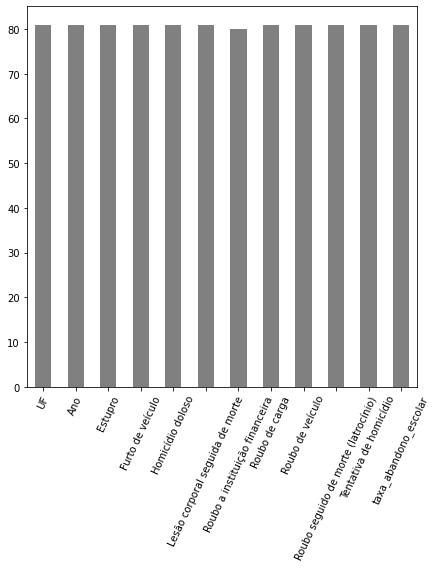

In [126]:
# Dados praticamente balanceados

count_ = df_principal.count()
count_.plot(kind='bar',color='grey', figsize=(7,7))
plt.xticks(rotation=65)
plt.show()

In [127]:
# Transformando taxa de abandonode object para em float

df_principal['taxa_abandono_escolar'] = df_principal['taxa_abandono_escolar'].astype(float)
df_principal['taxa_abandono_escolar']

0     2.3
1     2.2
2     2.1
3     3.3
4     2.9
     ... 
76    0.5
77    0.4
78    1.2
79    1.1
80    0.9
Name: taxa_abandono_escolar, Length: 81, dtype: float64

In [128]:
# Desvio padrão em ordem de tamanho: furto de veículo, roubo de veículo, estupro, roubo de carga

df_principal.describe()

,Ano,Estupro,Furto de veículo,Homicídio doloso,Lesão corporal seguida de morte,Roubo a instituição financeira,Roubo de carga,Roubo de veículo,Roubo seguido de morte (latrocínio),Tentativa de homicídio,taxa_abandono_escolar
count,81.000000,81.000000,81.000000,81.000000,81.000000,80.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,2018.000000,1814.000000,8908.839506,1691.086420,33.913580,25.600000,802.012346,8714.345679,70.703704,1365.358025,1.625926
std,0.821584,2369.486395,18112.940583,1452.864474,48.266758,24.857874,2364.603246,13654.746638,64.929470,1228.119216,0.949049
min,2017.000000,89.000000,216.000000,159.000000,0.000000,0.000000,0.000000,228.000000,7.000000,61.000000,0.400000
25%,2017.000000,568.000000,1539.000000,528.000000,7.000000,6.750000,8.000000,1836.000000,26.000000,430.000000,0.800000
50%,2018.000000,1024.000000,3588.000000,1121.000000,21.000000,20.000000,39.000000,3957.000000,47.000000,842.000000,1.300000
75%,2019.000000,1783.000000,8277.000000,2380.000000,40.000000,38.250000,310.000000,9522.000000,87.000000,2162.000000,2.300000
max,2019.000000,11949.000000,104829.000000,5843.000000,301.000000,97.000000,10599.000000,67964.000000,334.000000,4375.000000,3.800000


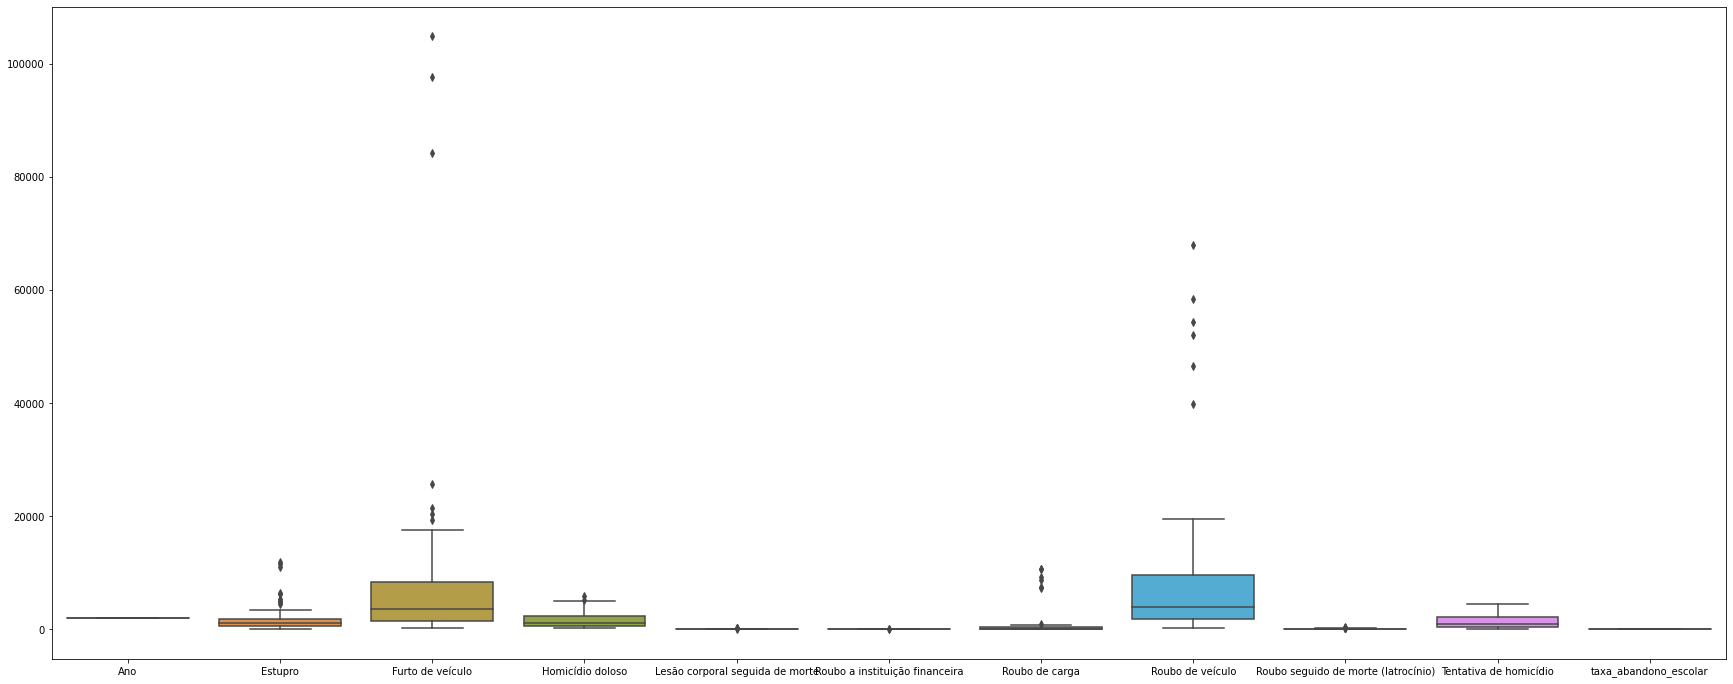

In [129]:
# Principais colunas com outliers: Extremos(Furto de veículo, roubo de veículo), estupro e roubo de carga

fig = plt.figure(figsize=(30,12))
sns.boxplot(data=df_principal)
plt.show()

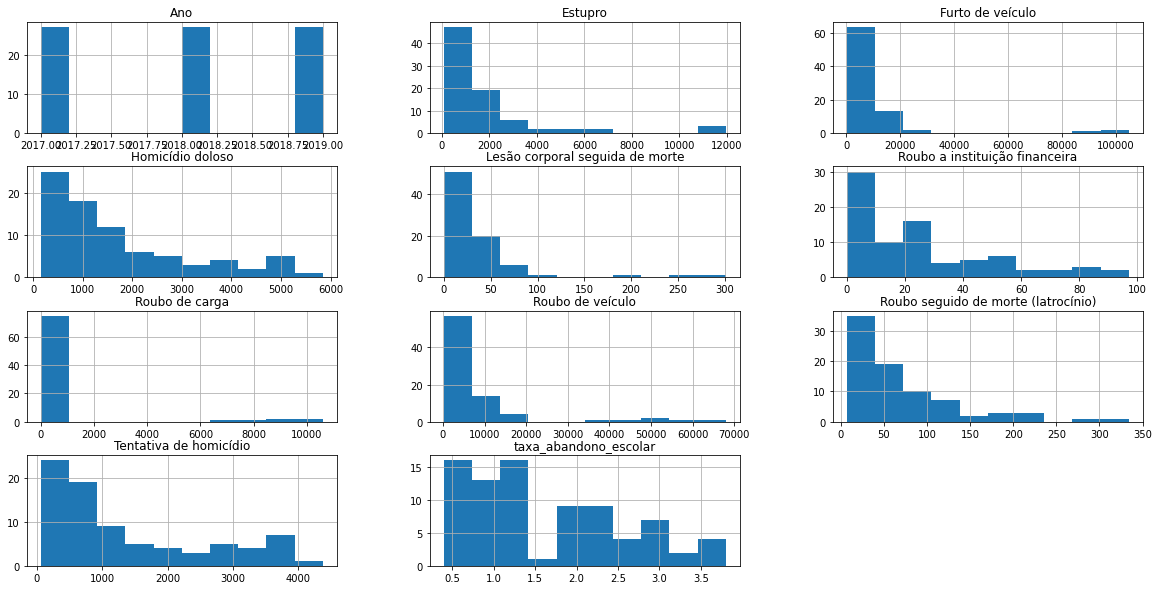

In [130]:
# Grande obliquidade nos dados

df_principal.hist(figsize=(20,10))
plt.show()

In [131]:
# Substituindo o valor de Roubo a instituição financeira pela média da coluna 

df_principal['Roubo a instituição financeira'] = df_principal['Roubo a instituição financeira'].fillna(df_principal['Roubo a instituição financeira'].mean())

In [132]:
df_principal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   UF                                   81 non-null     object 
 1   Ano                                  81 non-null     int64  
 2   Estupro                              81 non-null     float64
 3   Furto de veículo                     81 non-null     float64
 4   Homicídio doloso                     81 non-null     float64
 5   Lesão corporal seguida de morte      81 non-null     float64
 6   Roubo a instituição financeira       81 non-null     float64
 7   Roubo de carga                       81 non-null     float64
 8   Roubo de veículo                     81 non-null     float64
 9   Roubo seguido de morte (latrocínio)  81 non-null     float64
 10  Tentativa de homicídio               81 non-null     float64
 11  taxa_abandono_escolar             

In [133]:
# Verificar duplicidade instâncias usando a base original.

dataframe_temp = df_principal
duplicated_rows = dataframe_temp[dataframe_temp.duplicated(keep='last')]
duplicated_rows.shape

(0, 12)

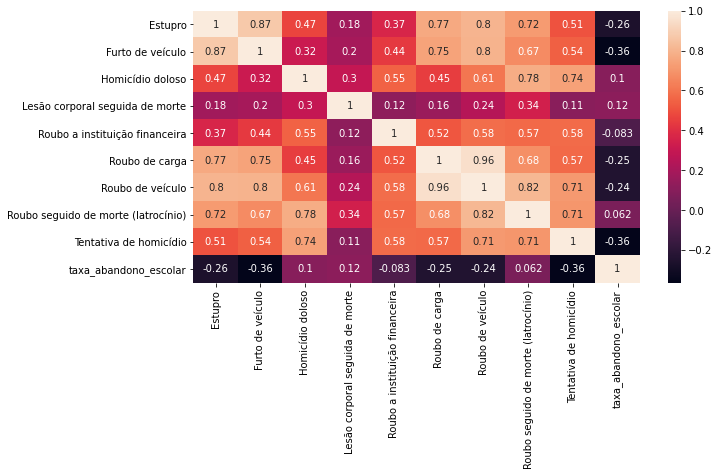

In [134]:
# Aparentemente a taxa de abandono escolar tem correlação inversa com a maioria dos atributos
# algo errado com certeza!
df_principal_corr = df_principal[['Estupro','Furto de veículo','Homicídio doloso',
                                'Lesão corporal seguida de morte',
                                'Roubo a instituição financeira',
                                'Roubo de carga','Roubo de veículo',
                                'Roubo seguido de morte (latrocínio)',
                                'Tentativa de homicídio',
                                'taxa_abandono_escolar']].corr()

# df_principal_corr = df_principal.corr()

fig = plt.figure(figsize=(10,5))
sns.heatmap(df_principal_corr, xticklabels=df_principal_corr.columns, yticklabels=df_principal_corr.columns, annot=True)
plt.show()

In [135]:
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(df_principal[['Estupro','Furto de veículo','Homicídio doloso',
                                'Lesão corporal seguida de morte',
                                'Roubo a instituição financeira',
                                'Roubo de carga','Roubo de veículo',
                                'Roubo seguido de morte (latrocínio)',
                                'Tentativa de homicídio',
                                'taxa_abandono_escolar']])
scaled_array

array([[1.60202361e-03, 3.08757038e-03, 1.09078114e-02, 0.00000000e+00,
        5.15463918e-02, 2.83045570e-04, 9.16794614e-03, 9.17431193e-03,
        0.00000000e+00, 5.58823529e-01],
       [1.44182125e-02, 4.66481221e-03, 4.16959887e-02, 0.00000000e+00,
        3.09278351e-02, 9.43485234e-05, 1.25782450e-02, 3.97553517e-02,
        5.79508577e-03, 5.29411765e-01],
       [2.03204047e-02, 3.40301875e-03, 2.33990148e-02, 6.64451827e-03,
        4.12371134e-02, 3.77394094e-04, 1.50289359e-02, 2.14067278e-02,
        1.69216504e-02, 5.00000000e-01],
       [4.94940978e-02, 9.34874251e-03, 2.66185785e-01, 6.31229236e-02,
        2.16494845e-01, 7.26483631e-03, 4.28870911e-02, 1.59021407e-01,
        1.19610570e-01, 8.52941176e-01],
       [3.08600337e-02, 9.00461702e-03, 2.02322308e-01, 2.65780731e-02,
        2.26804124e-01, 8.01962449e-03, 4.80246841e-02, 9.78593272e-02,
        8.78535002e-02, 7.35294118e-01],
       [4.59527825e-02, 1.10884880e-02, 1.52885292e-01, 1.99335548e-02,
   

In [136]:
df_principal_norm = pd.DataFrame(scaled_array, index=df_principal.index, columns=['Estupro','Furto de veículo','Homicídio doloso',
                                'Lesão corporal seguida de morte',
                                'Roubo a instituição financeira',
                                'Roubo de carga','Roubo de veículo',
                                'Roubo seguido de morte (latrocínio)',
                                'Tentativa de homicídio',
                                'taxa_abandono_escolar'])
df_principal_norm.head(100)

,Estupro,Furto de veículo,Homicídio doloso,Lesão corporal seguida de morte,Roubo a instituição financeira,Roubo de carga,Roubo de veículo,Roubo seguido de morte (latrocínio),Tentativa de homicídio,taxa_abandono_escolar
0,0.001602,0.003088,0.010908,0.000000,0.051546,0.000283,0.009168,0.009174,0.000000,0.558824
1,0.014418,0.004665,0.041696,0.000000,0.030928,0.000094,0.012578,0.039755,0.005795,0.529412
2,0.020320,0.003403,0.023399,0.006645,0.041237,0.000377,0.015029,0.021407,0.016922,0.500000
3,0.049494,0.009349,0.266186,0.063123,0.216495,0.007265,0.042887,0.159021,0.119611,0.852941
4,0.030860,0.009005,0.202322,0.026578,0.226804,0.008020,0.048025,0.097859,0.087854,0.735294
...,...,...,...,...,...,...,...,...,...,...
76,1.000000,0.931404,0.490852,0.265781,0.556701,0.824417,0.858140,0.804281,0.793463,0.029412
77,0.971754,0.801841,0.460767,0.328904,0.216495,0.691103,0.683315,0.562691,0.771674,0.000000
78,0.040051,0.012647,0.031316,0.023256,0.237113,0.000755,0.008666,0.012232,0.063514,0.235294
79,0.053794,0.017933,0.035890,0.023256,0.072165,0.000000,0.012741,0.027523,0.082522,0.205882


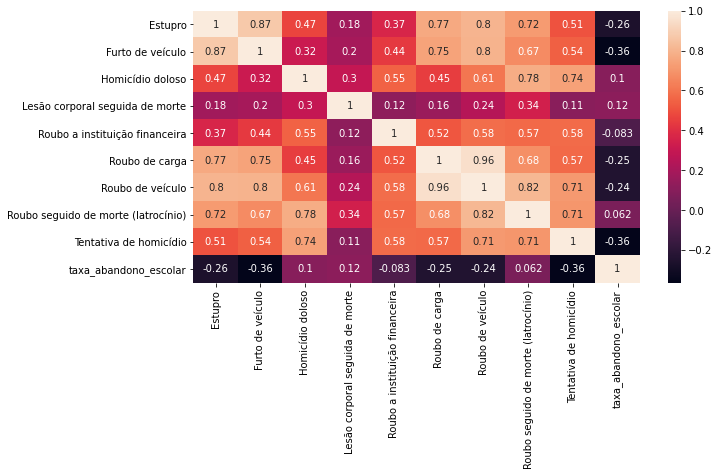

In [137]:
# Mesmo depois de normalizar n existe aparente correlação com a taxa de abandono escolar
# entendi o motivo de não ter, a minha escolha foi infeliz em relação a base, 
# talvez se eu tivesse pego a taxa de abandono de 20 anos ou mais atrás tivsse 
# mais sentido.

df_scaled_corr = df_principal_norm.corr()

fig = plt.figure(figsize=(10,5))
sns.heatmap(df_scaled_corr, xticklabels=df_scaled_corr.columns, yticklabels=df_scaled_corr.columns, annot=True)
plt.show()

#Aplicação dos algoritmos de clusterização

In [138]:
# Imports necessários
from sklearn.cluster import KMeans
from sklearn import metrics

# Variando o número de k de 1 a 10 para analisar os valores da métrica

for k in range(2, 20):
  km = KMeans(n_clusters=k,random_state=42)
  km.fit(df_principal_norm)
  score = metrics.silhouette_score(df_principal_norm, km.labels_, metric='euclidean')
  print("Para k=%i o valor Silhoutte foi de %.4f" % (k, score))

Para k=2 o valor Silhoutte foi de 0.4460
Para k=3 o valor Silhoutte foi de 0.3783
Para k=4 o valor Silhoutte foi de 0.2922
Para k=5 o valor Silhoutte foi de 0.2949
Para k=6 o valor Silhoutte foi de 0.3288
Para k=7 o valor Silhoutte foi de 0.3612
Para k=8 o valor Silhoutte foi de 0.3704
Para k=9 o valor Silhoutte foi de 0.3607
Para k=10 o valor Silhoutte foi de 0.3938
Para k=11 o valor Silhoutte foi de 0.3790
Para k=12 o valor Silhoutte foi de 0.3899
Para k=13 o valor Silhoutte foi de 0.3960
Para k=14 o valor Silhoutte foi de 0.3996
Para k=15 o valor Silhoutte foi de 0.4179
Para k=16 o valor Silhoutte foi de 0.4058
Para k=17 o valor Silhoutte foi de 0.4118
Para k=18 o valor Silhoutte foi de 0.4064
Para k=19 o valor Silhoutte foi de 0.4118


In [139]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_principal_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [140]:
clusters = kmeans.labels_.tolist()
clusters_dict = {'UF' : df_principal.UF, 'Ano' : list(df_principal.Ano), 'clusters' : clusters}
dataframe_clusters = pd.DataFrame(clusters_dict, columns = ['UF','Ano', 'clusters'])
dataframe_clusters

,UF,Ano,clusters
0,Acre,2017,0
1,Acre,2018,0
2,Acre,2019,0
3,Alagoas,2017,0
4,Alagoas,2018,0
...,...,...,...
76,São Paulo,2018,1
77,São Paulo,2019,1
78,Tocantins,2017,0
79,Tocantins,2018,0


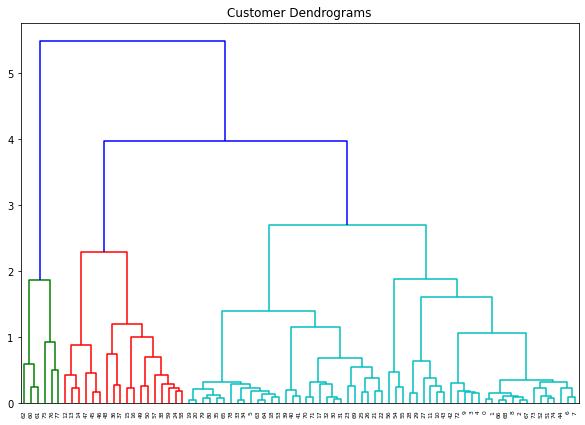

In [141]:
plt.figure(figsize=(10, 7))
plt.title("Customer Dendrograms")
dend = shc.dendrogram(shc.linkage(df_principal_norm, method='ward'))

In [142]:
agg_cluster = AgglomerativeClustering(affinity='euclidean', linkage='ward')
agg_cluster.fit(df_principal_norm)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [143]:
clusters_h = agg_cluster.labels_.tolist()
clusters_dict_h = {'UF' : df_principal.UF, 'Ano' : list(df_principal.Ano), 'clusters' : clusters}
dataframe_clusters_h = pd.DataFrame(clusters_dict, columns = ['UF','Ano', 'clusters'])
dataframe_clusters_h

,UF,Ano,clusters
0,Acre,2017,0
1,Acre,2018,0
2,Acre,2019,0
3,Alagoas,2017,0
4,Alagoas,2018,0
...,...,...,...
76,São Paulo,2018,1
77,São Paulo,2019,1
78,Tocantins,2017,0
79,Tocantins,2018,0


In [144]:
print('Kmeans', metrics.silhouette_score(df_principal_norm, kmeans.labels_, metric='euclidean'))
print('AgglomerativeClustering', metrics.silhouette_score(df_principal_norm, agg_cluster.labels_, metric='euclidean'))

Kmeans 0.37828932385028136
AgglomerativeClustering 0.5796251427900636


In [145]:
dataframe_clusters_h.to_csv('AgglomerativeClustering.csv') 

In [146]:
dataframe_clusters.to_csv(r'Kmeans.csv')

#Visualização dos dados

In [147]:
!conda install -c conda-forge folium -y

/bin/bash: conda: command not found


In [148]:
pip install folium

In [149]:
import folium
print(folium.__version__)

0.8.3


In [150]:
import json

br_estados = "/content/gdrive/MyDrive/Colab Notebooks/Machine Learning/Bases/trabalho_pratico02/br_states.json"

geo_json_data = json.load(open(br_estados))

In [151]:
import pandas as pd

df_mapa = dataframe_clusters_h[['UF','clusters']]
df_mapa.head()

,UF,clusters
0,Acre,0
1,Acre,0
2,Acre,0
3,Alagoas,0
4,Alagoas,0


In [152]:
df_mapa.describe()

,clusters
count,81.000000
mean,0.567901
std,0.865134
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


In [153]:
from branca.colormap import linear


colormap = linear.YlOrRd_09.scale(6,20)
colormap

In [154]:
df_mapa2 = df_mapa.set_index('UF')['clusters']

In [155]:
df_mapa2

UF
Acre         0
Acre         0
Acre         0
Alagoas      0
Alagoas      0
            ..
São Paulo    1
São Paulo    1
Tocantins    0
Tocantins    0
Tocantins    0
Name: clusters, Length: 81, dtype: int64

In [ ]:
mapa = folium.Map(
    width=600, height=400,
    location=[-15.77972, -47.92972], 
    zoom_start=3
)

folium.GeoJson(
    geo_json_data,
    name='UF',
    style_function=lambda feature: {
        'fillColor': colormap(df_mapa2[feature['UF']]),
        'color': 'black',
        'weight': 0.3,
    }
    
).add_to(mapa)

colormap.caption = 'Taxa de criminalidade'
colormap.add_to(mapa)

folium.LayerControl(collapsed=False).add_to(mapa)
# mapa.save('taxa_br_2018.html')
mapa